<a href="https://colab.research.google.com/github/KenLGrid/Prediction-of-Product-Sales/blob/main/Prediction_of_product_sales9_10_13_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Kenya Carmichael

## Project Overview

## Load and Inspect Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)


In [ ]:
# Save the filepath and load the data
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fname)

## Clean Data

In [ ]:
# HOW MANY ROWS/COLUMNS IN THE DATASET?
df.shape

(8523, 12)

In [ ]:
# CHECK THE DATATYPES:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# Display the info for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Display the first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Display the last 5 rows
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
# ARE THERE ANY DUPLICATES?
# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows = df.duplicated()

# Get the sum of duplicated_rows filter to see the number of duplicate rows
num_duplicates = duplicated_rows.sum()
print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 0


In [ ]:
# MISSING VALUES:
# Load the dataset into a DataFrame

df = pd.read_csv(fname)

null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# MISSING VALUES:
# Check the datatype

type(null_sums)

pandas.core.series.Series

In [ ]:
# MISSING VALUES:
# Get the % of null values

null_percent = null_sums/len(df) * 100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
# MISSING VALUES:
# Viewing only columns with null values

null_percent[null_percent>0]

Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64

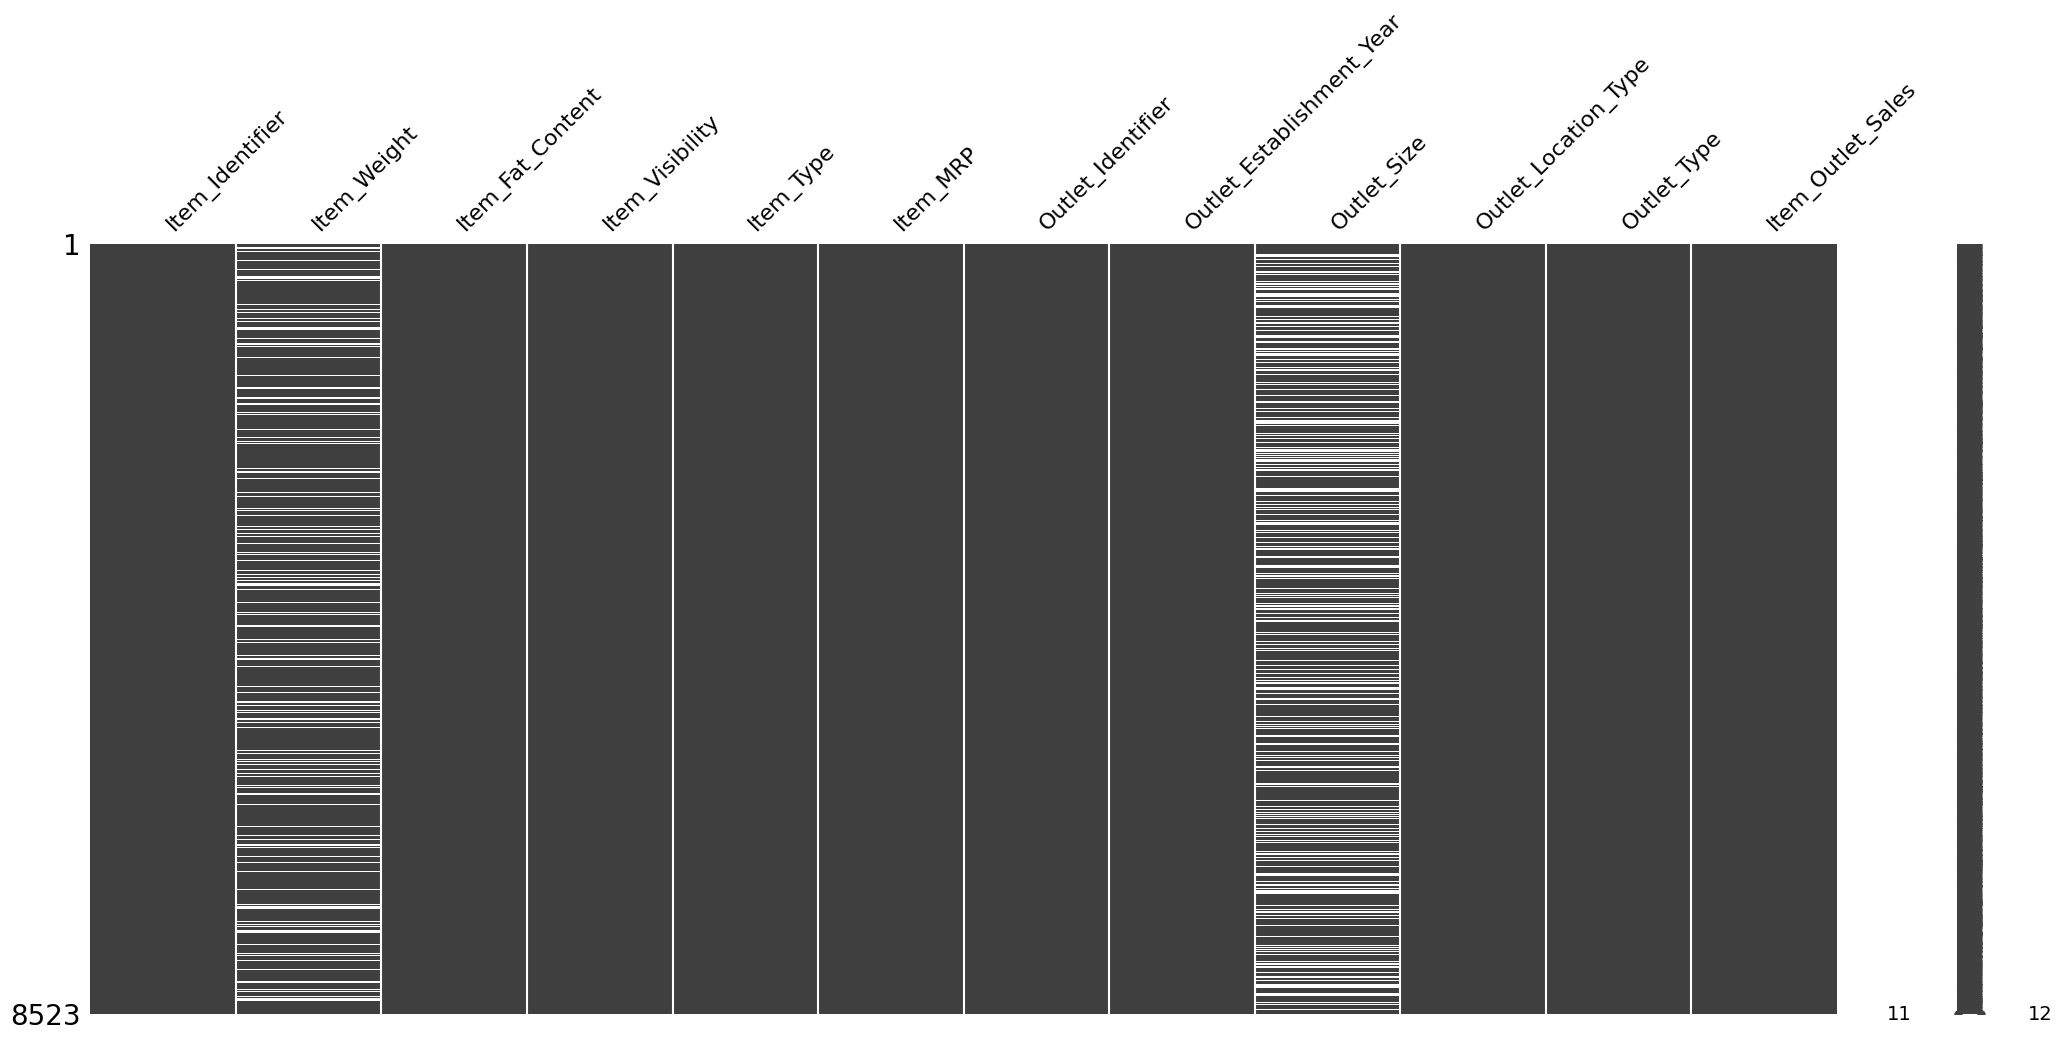

In [ ]:
# MISSING VALUES:
# Visualizing null values
# Run the Matrix function on the dataframe

import missingno as msno
msno.matrix(df);

In [ ]:
# MISSING VALUES:
# Using fillna to fill nulls with N/A

df['Outlet_Size'] = df['Outlet_Size'].fillna("MISSING")
df['Outlet_Size'].value_counts(dropna=False)

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [ ]:
# MISSING VALUES:
# Using fillna to fill nulls with N/A
df['Item_Weight'] = df['Item_Weight'].fillna("-1")
df['Item_Weight'].value_counts(dropna=False)

-1       1463
12.15      86
17.6       82
13.65      77
11.8       76
         ... 
7.275       2
7.685       1
9.42        1
6.52        1
5.4         1
Name: Item_Weight, Length: 416, dtype: int64

In [ ]:
# FIND AND FIX ANY INCONSISTENT CATEGORIES OF DATA:
# Identify string columns
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
# FIND AND FIX ANY INCONSISTENT CATEGORIES OF DATA:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Weight
-1       1463
12.15      86
17.6       82
13.65      77
11.8       76
         ... 
7.275       2
7.685       1
9.42        1
6.52        1
5.4         1
Name: Item_Weight, Length: 416, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others       

In [ ]:
# FIND AND FIX ANY INCONSISTENT CATEGORIES OF DATA:
# Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# FIND AND FIX ANY INCONSISTENT CATEGORIES OF DATA:
# Standardize the values in the Item_Fat_Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':"Low Fat",'reg':'Regular','low fat': 'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# FIND AND FIX ANY INCONSISTENT CATEGORIES OF DATA:
# For any numerical columns, obtain the summary statistics of each (min, max, mean).
summary_stats = df.describe()
print(summary_stats)

       Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count      8523.000000  8523.000000                8523.000000   
mean          0.066132   140.992782                1997.831867   
std           0.051598    62.275067                   8.371760   
min           0.000000    31.290000                1985.000000   
25%           0.026989    93.826500                1987.000000   
50%           0.053931   143.012800                1999.000000   
75%           0.094585   185.643700                2004.000000   
max           0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


## Exploratory Data Analysis

<Axes: >

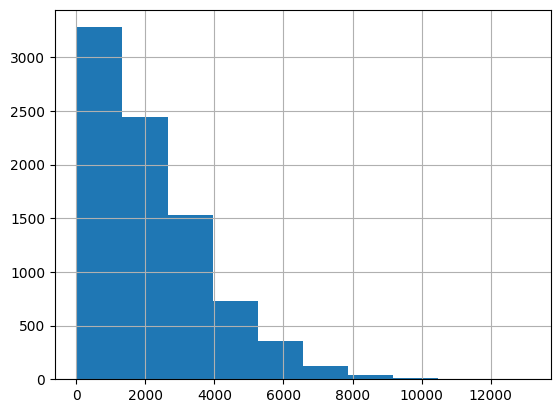

In [ ]:
# Create a Histogram of Item Outlet Sales
df['Item_Outlet_Sales'].hist()

# This histogram shows, that on average, at least 1000
# sales average $3,800, on the high end. About 2000 sales
# average around $2,400 as a median, with the low end of
# about 1000 sales averaging between $8,000-$10,000.

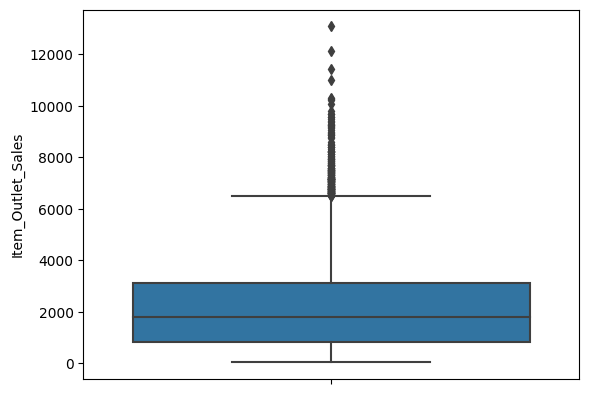

In [ ]:
# Create a Boxplot displaying Item Outlet Sales
ax = sns.boxplot(data=df, y="Item_Outlet_Sales")

# This boxplot shows the majority of sales, on average
# equal between $1500 - $3000, with several outliers
# of sales averaging between $7,000 - $10,000.

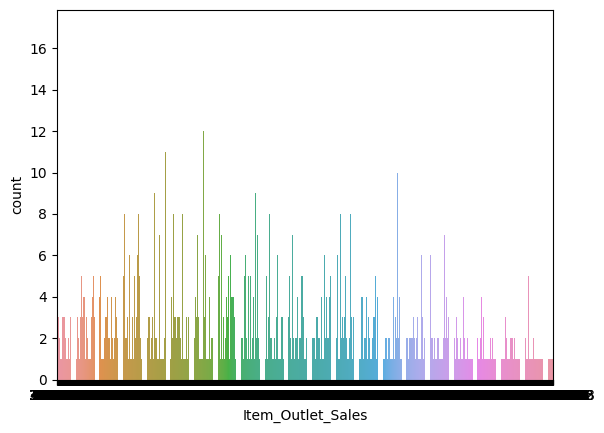

In [ ]:
# Create a Countplot displaying Item Outlet Sales
ax = sns.countplot(data=df, x='Item_Outlet_Sales')

# This countplot breaks down the counts of each
# category in Item Outlet Sales.

In [ ]:
# View Correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.00,-0.00,-0.07,-0.13
Item_MRP,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.13,0.57,-0.05,1.00


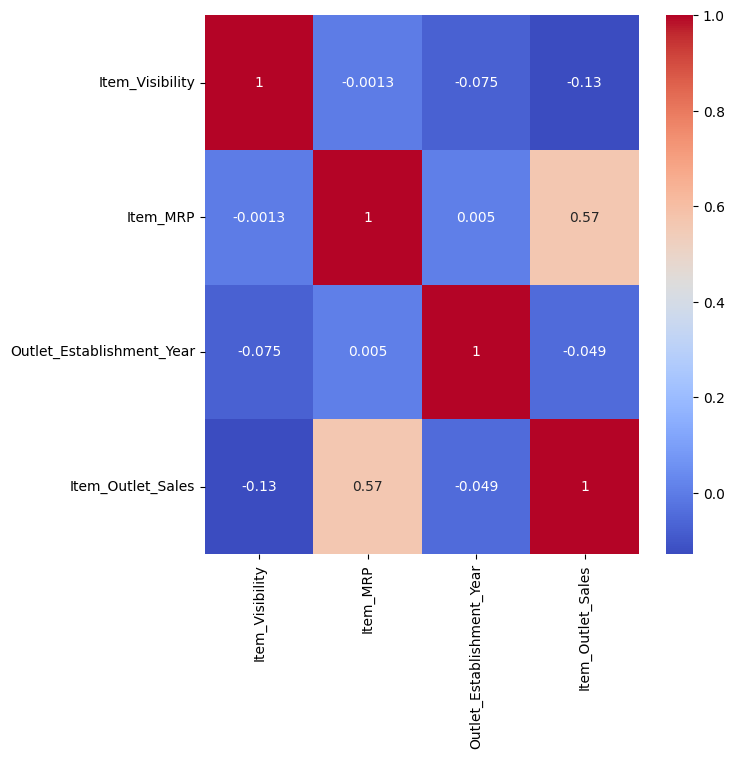

In [ ]:
# Create Heatmap of Correlations
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);

# This heatmap shows that Item Visibility is a strong
# determining factor in the correlation between Item_MRP
# and Item_Outlet_Sales.

## Feature Inspection